# K-NEAREST NEIGHBOURS

1. Analyse the data using the visualizations

2. Preprocess the data by handling missing values & Outliers, if any.


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


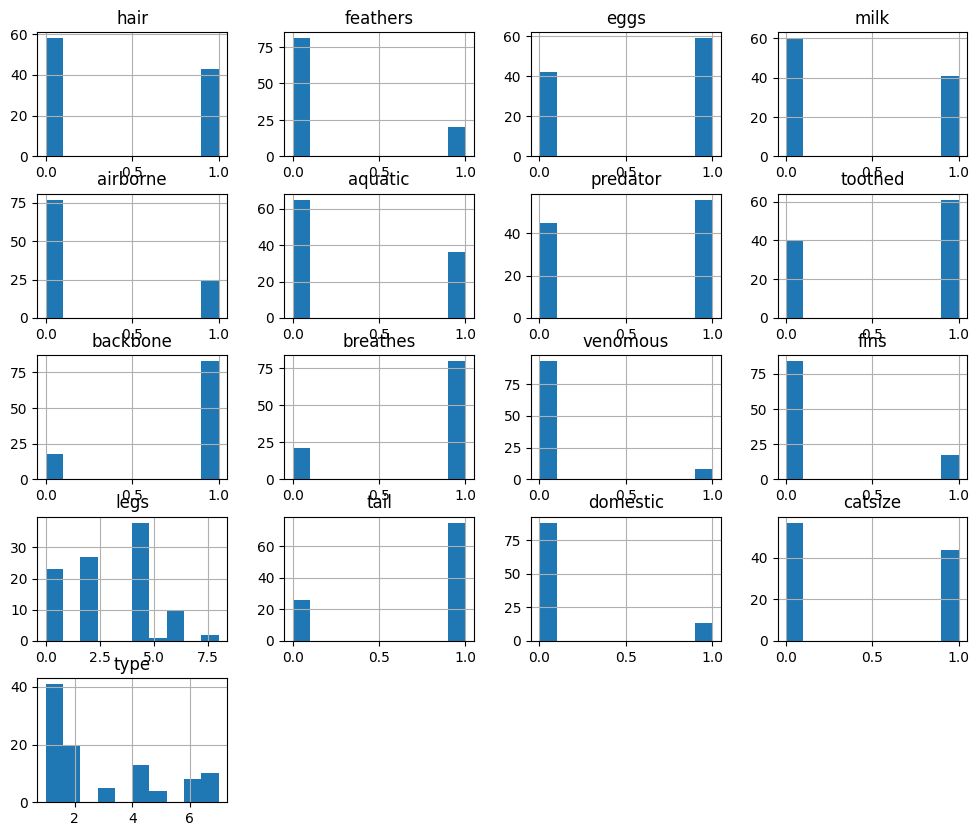

In [5]:
# Histograms for each feature
df.hist(figsize=(12, 10))
plt.show()

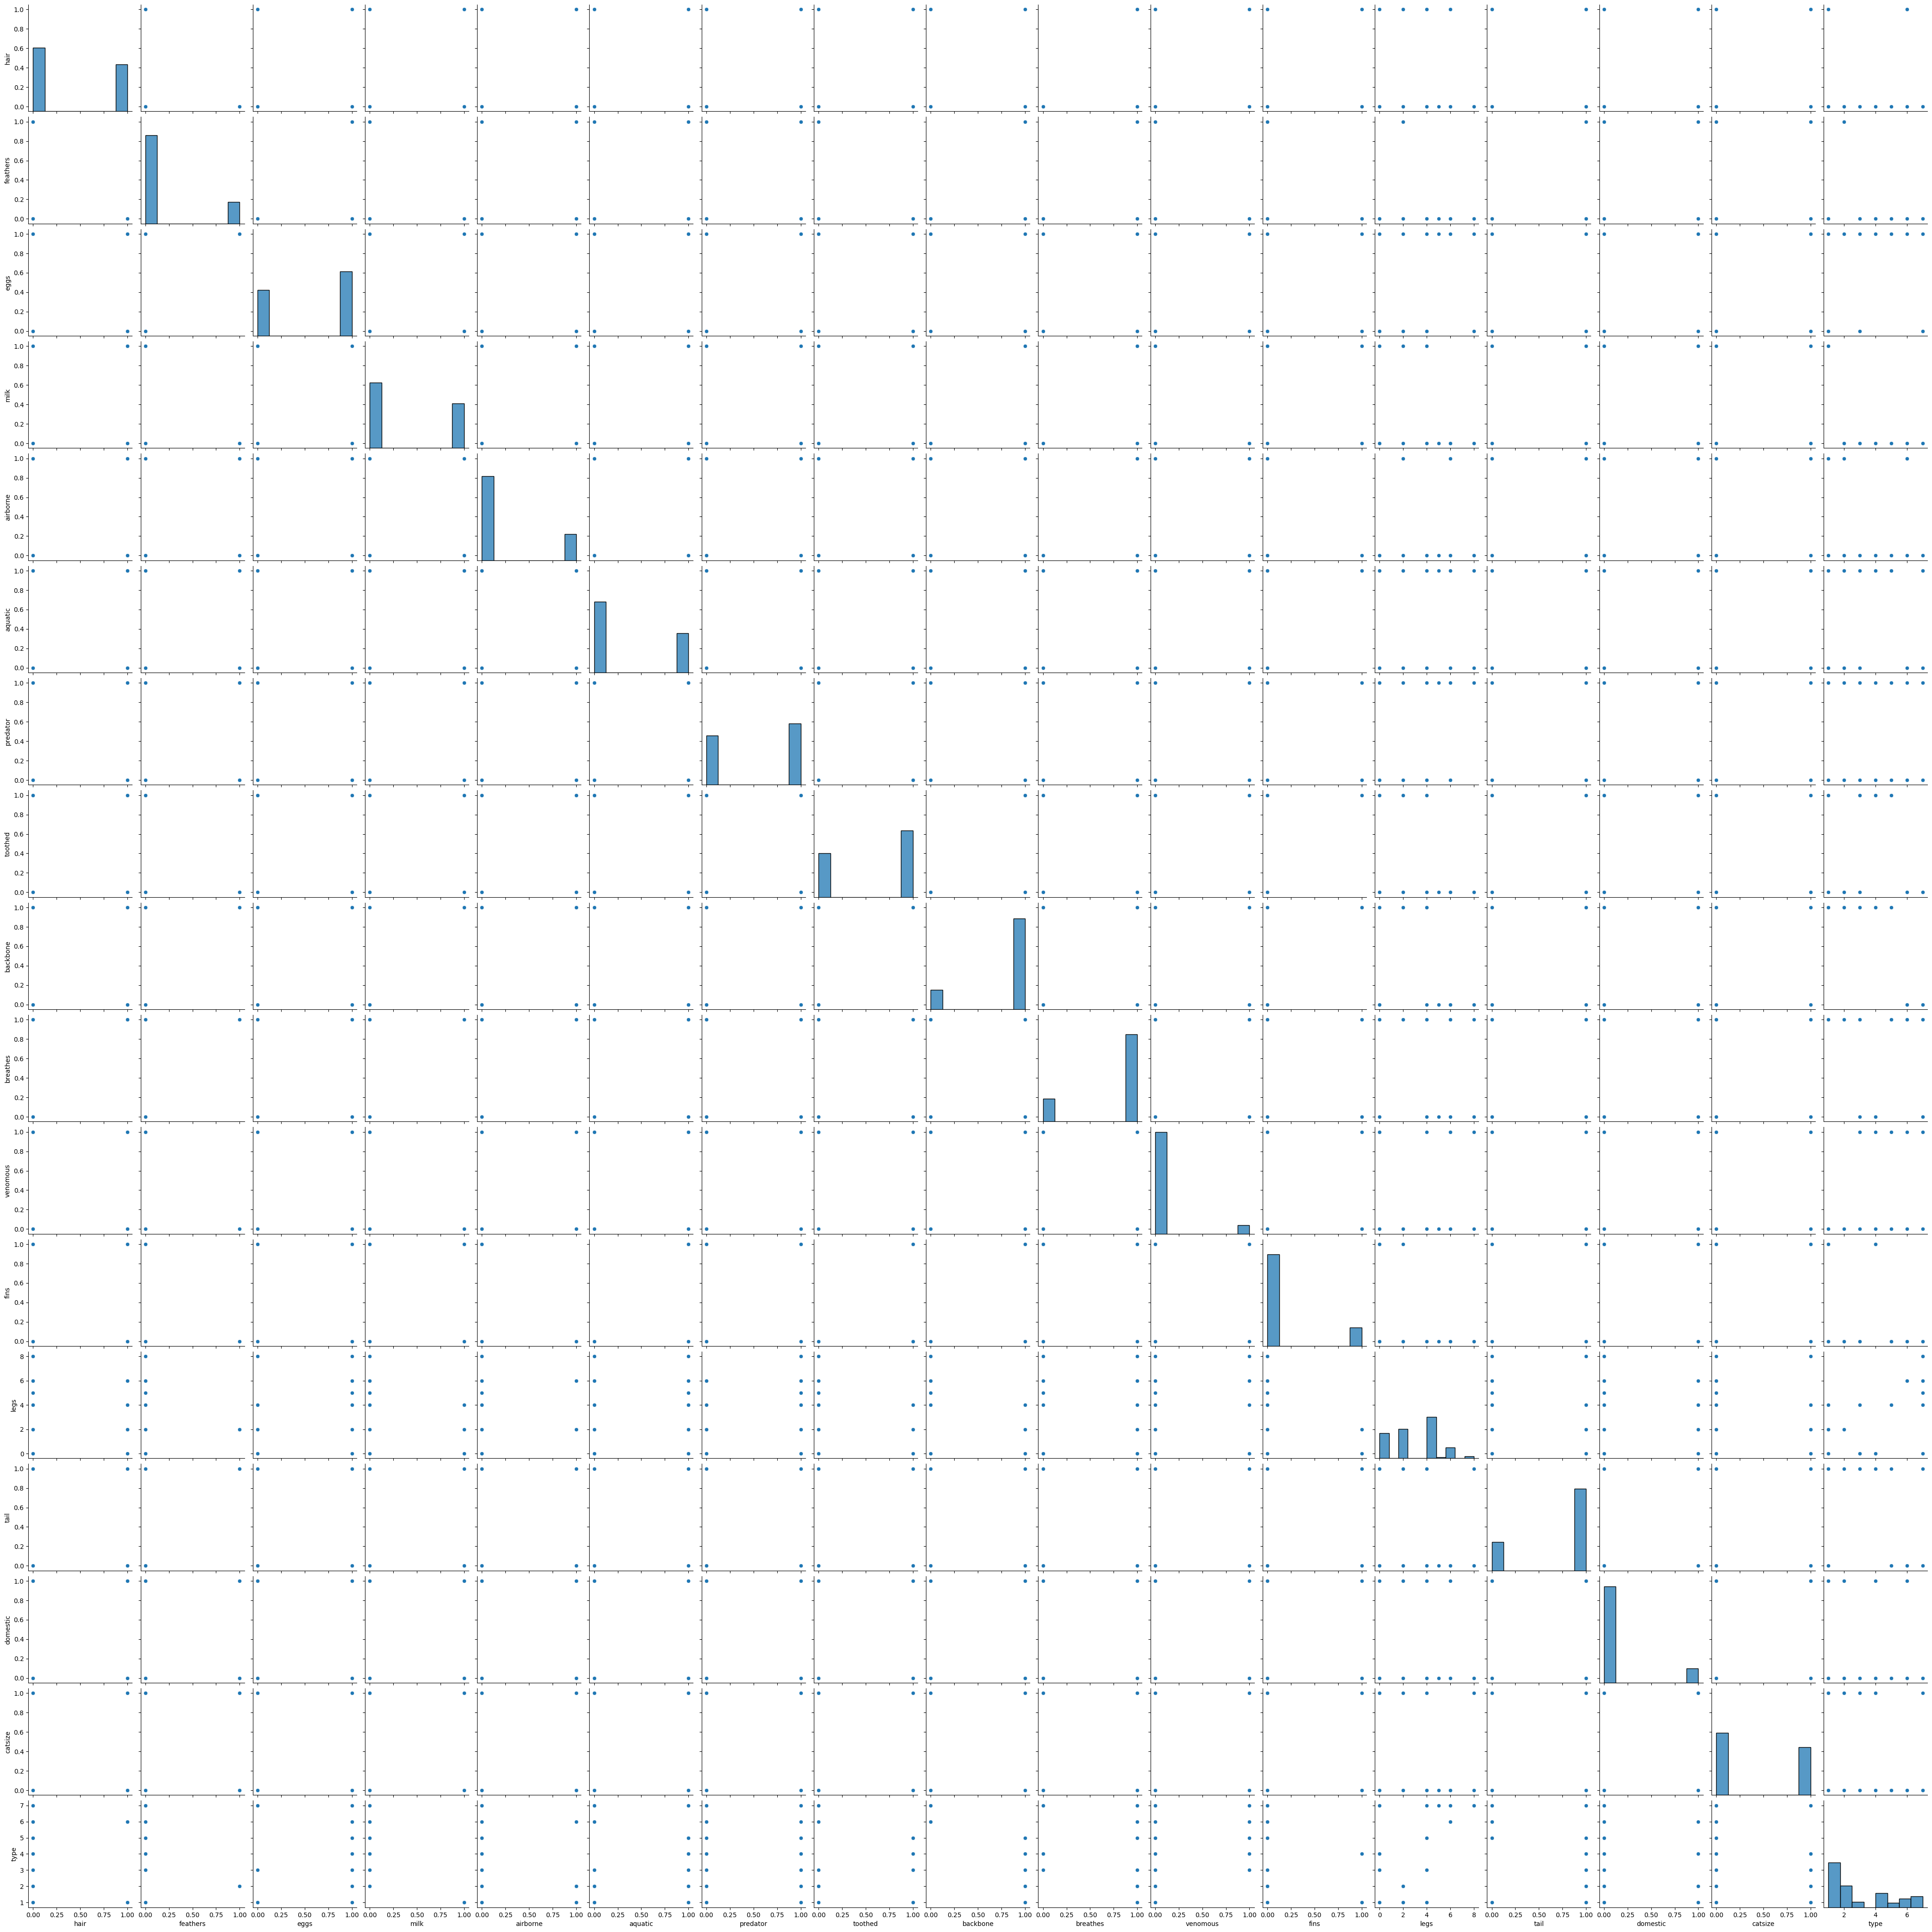

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
# Check for missing values
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [8]:
# Define a function to identify outliers using Z-score
from scipy import stats
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

3. Split the dataset into training and testing sets (80% training, 20% testing

In [9]:
# Importing the libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [10]:
df.shape

(93, 18)

In [11]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [12]:
x = df.iloc[:, [1, 16]].values
y = df.iloc[:, 17].values

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

5. Choose an appropriate distance metric and value for K.

6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

7. Visualize the decision boundaries of the classifier.


In [13]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
#Predicting the test set result
y_pred1 = classifier_knn.predict(x_test)
y_pred1

array([2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2])

In [15]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred1)
cm

array([[7, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 5, 0, 0],
       [0, 2, 0, 0]])

In [16]:
cl= classification_report(y_test, y_pred1)
print(cl)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.42      1.00      0.59         5
           4       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         2

    accuracy                           0.63        19
   macro avg       0.35      0.50      0.40        19
weighted avg       0.48      0.63      0.52        19



In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,31)]
scores = []

scalar = StandardScaler()
X = scalar.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=7)
    scores.append(np.mean(score))
print(scores)

[np.float64(0.5690737833594977), np.float64(0.5910518053375196), np.float64(0.5149136577708006), np.float64(0.5698587127158555), np.float64(0.5698587127158555), np.float64(0.6130298273155417), np.float64(0.6130298273155417), np.float64(0.5910518053375196), np.float64(0.5910518053375196), np.float64(0.5910518053375196), np.float64(0.5910518053375196), np.float64(0.6130298273155416), np.float64(0.5800627943485086), np.float64(0.5910518053375196), np.float64(0.5800627943485086), np.float64(0.6130298273155416), np.float64(0.6130298273155416), np.float64(0.6350078492935636), np.float64(0.6350078492935636), np.float64(0.6350078492935636), np.float64(0.6350078492935636), np.float64(0.6350078492935636), np.float64(0.6350078492935636), np.float64(0.6350078492935636), np.float64(0.6350078492935636), np.float64(0.6350078492935636), np.float64(0.6350078492935636), np.float64(0.6350078492935636), np.float64(0.6350078492935636), np.float64(0.6350078492935636)]


Text(0, 0.5, 'Accuracy Score')

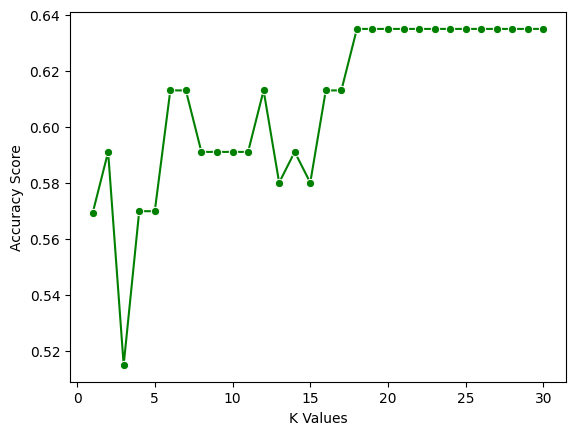

In [18]:
sns.lineplot(x = k_values, y = scores, marker = 'o' , color = 'green')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [19]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [20]:
from sklearn.metrics import accuracy_score
y_pred2 = knn.predict(x_train)
accuracy = accuracy_score(y_train,y_pred2)
print(accuracy)

0.6351351351351351


In [21]:
cl = classification_report(y_train,y_pred2)
print(cl)

              precision    recall  f1-score   support

           1       0.94      0.94      0.94        34
           2       0.38      1.00      0.55        15
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         6

    accuracy                           0.64        74
   macro avg       0.19      0.28      0.21        74
weighted avg       0.51      0.64      0.54        74



In [22]:
y_pred3 = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred3)
print(accuracy)

0.631578947368421


In [23]:
df = pd.DataFrame(X)
df

,0,1
0,1.126185,1.078328
1,1.126185,1.078328
2,-0.887954,-0.927362
3,1.126185,1.078328
4,1.126185,1.078328
...,...,...
88,-0.887954,1.078328
89,1.126185,1.078328
90,1.126185,1.078328
91,-0.887954,-0.927362


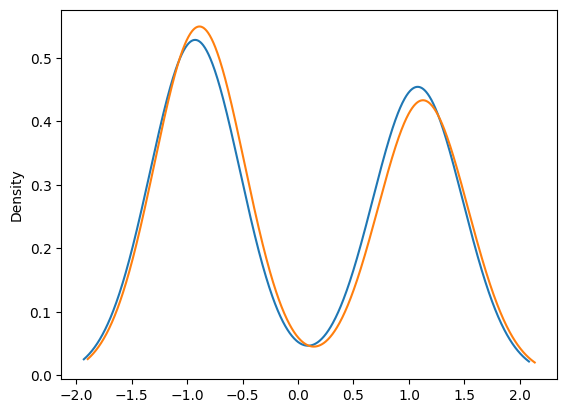

In [24]:
df[1].plot(kind = 'kde')
df[0].plot(kind = 'kde')
plt.show()

# Interview Questions

1. What are the key hyperparameters in KNN?

The main hyperparameter in k-nearest neighbors is k, the number of neighbors to consider. Other parameters include distance metrics, weights, and algorithm types

2.What distance metrics can be used in KNN?

Commonly used distance metrics for optimizing K-Nearest Neighbors (KNN) algorithms include Euclidean distance, Manhattan distance, Minkowski distance, and Cosine similarity